In [1]:
using Revise
using UrlDownload
using JSON3
using StructArrays
using Dates
using Geodesy
using MinimalRides
using TimeZones
using Underscores
using Plots
using DataFrames

┌ Info: Precompiling UrlDownload [856ac37a-3032-4c1c-9122-f86d88358c8b]
└ @ Base loading.jl:1278
┌ Info: Precompiling MinimalRides [22e11959-74d5-4147-9c6f-08cd49ebc7f1]
└ @ Base loading.jl:1278


In [4]:
RAW_DATA_URL_UPDATED = ("https://dl.dropboxusercontent.com" *
    "/sh/hibzl6fkzukltk9/AABSMicBJlwMnlmA3ljt1uY5a" *
    "/data_samples-json2.zip")

"https://dl.dropboxusercontent.com/sh/hibzl6fkzukltk9/AABSMicBJlwMnlmA3ljt1uY5a/data_samples-json2.zip"

In [5]:
urldownload(RAW_DATA_URL_UPDATED)

┌ Warning: More than one file in zip archive, returning first.
└ @ UrlDownload /home/skoffer/.julia/packages/UrlDownload/6V6Io/src/UrlDownload.jl:310


JSON3.Object{Base.CodeUnits{UInt8,String},Array{UInt64,1}} with 2 entries:
  :info => {…
  :data => JSON3.Array[Union{Float64, Int64}[1590555650, 20.5964, 54.5518, 49, …

In [7]:
data = urldownload("./1/0055c29f-9b28-11ea-a752-2c59e53f5668.json")

JSON3.Object{Array{UInt8,1},Array{UInt64,1}} with 2 entries:
  :info => {…
  :data => JSON3.Array[Union{Float64, Int64}[1590555650, 20.5964, 54.5518, 49, …

In [12]:
res = urldownload("https://github.com/epogrebnyak/rides-minimal/blob/master/sample_jsons/sample_jsons.zip?raw=true", multifiles = true);
rides = MinimalRides.Ride.(res);

In [22]:
Date(rides[1].info.start_ts)
DAYS = Date.(["2019-09-06"])
TYPES = [:bus]

@_ filter((Date(_.info.start_ts) in DAYS) & (_.info.car_type in TYPES), rides)

1-element Array{MinimalRides.Ride,1}:
 MinimalRides.Ride(MinimalRides.Info("0a08bbc3-cfdb-11e9-80f2-10604ba895dc", "e2a88069-360c-11e5-989b-00155d630038", "Специальный\\Вахтовая а/м", 21, 4, :bus, ZonedDateTime(2019, 9, 6, 5, tz"UTC"), ZonedDateTime(2019, 9, 6, 14, tz"UTC")), MinimalRides.Location[MinimalRides.Location(1567749960, LatLon(lat=54.696055°, lon=20.4923216667°)), MinimalRides.Location(1567749965, LatLon(lat=54.6959216667°, lon=20.4922216667°)), MinimalRides.Location(1567749966, LatLon(lat=54.6959216667°, lon=20.4922216667°)), MinimalRides.Location(1567749966, LatLon(lat=54.6959216667°, lon=20.4922216667°)), MinimalRides.Location(1567749966, LatLon(lat=54.6959216667°, lon=20.4922216667°)), MinimalRides.Location(1567749986, LatLon(lat=54.69588°, lon=20.4921333333°)), MinimalRides.Location(1567750006, LatLon(lat=54.6958983333°, lon=20.4921033333°)), MinimalRides.Location(1567750026, LatLon(lat=54.6958983333°, lon=20.4921033333°)), MinimalRides.Location(1567750046, LatLon(lat=5

In [17]:
data.info

JSON3.Object{Array{UInt8,1},SubArray{UInt64,1,Array{UInt64,1},Tuple{UnitRange{Int64}},true}} with 7 entries:
  :id               => "0055c29f-9b28-11ea-a752-2c59e53f5668"
  :car_id           => "a1025692-03b6-492b-8bd2-5d62ffe20faa"
  :category         => "Легковой\\Седан"
  :car_passengers   => 5
  :cat_carry_weight => 440
  :start_dt         => "2020-05-27 05:00:00+00"
  :end_dt           => "2020-05-27 14:00:00+00"

In [2]:
res = urldownload("https://github.com/epogrebnyak/rides-minimal/blob/master/sample_jsons/sample_jsons.zip?raw=true", multifiles = true);

┌ Info: Precompiling ZipFile [a5390f91-8eb1-5f08-bee0-b1d1ffed6cea]
└ @ Base loading.jl:1278


In [3]:
MinimalRides.Location.(res[1].data)

3549-element Array{MinimalRides.Location,1}:
 MinimalRides.Location(1567749960, LatLon(lat=54.696055°, lon=20.4923216667°))
 MinimalRides.Location(1567749965, LatLon(lat=54.6959216667°, lon=20.4922216667°))
 MinimalRides.Location(1567749966, LatLon(lat=54.6959216667°, lon=20.4922216667°))
 MinimalRides.Location(1567749966, LatLon(lat=54.6959216667°, lon=20.4922216667°))
 MinimalRides.Location(1567749966, LatLon(lat=54.6959216667°, lon=20.4922216667°))
 MinimalRides.Location(1567749986, LatLon(lat=54.69588°, lon=20.4921333333°))
 MinimalRides.Location(1567750006, LatLon(lat=54.6958983333°, lon=20.4921033333°))
 MinimalRides.Location(1567750026, LatLon(lat=54.6958983333°, lon=20.4921033333°))
 MinimalRides.Location(1567750046, LatLon(lat=54.6958483333°, lon=20.49206°))
 MinimalRides.Location(1567750047, LatLon(lat=54.6958483333°, lon=20.49206°))
 MinimalRides.Location(1567750066, LatLon(lat=54.6958483333°, lon=20.49206°))
 MinimalRides.Location(1567750086, LatLon(lat=54.6958483333°, lon=

In [48]:
ZonedDateTime(res[3].info.start_dt, "yyyy-mm-dd HH:MM:SSzz")

2019-08-20T03:10:00+00:00

In [6]:
MinimalRides.Info(res[1].info)

MinimalRides.Info("0a08bbc3-cfdb-11e9-80f2-10604ba895dc", "e2a88069-360c-11e5-989b-00155d630038", "Специальный\\Вахтовая а/м", 21, 4, :special, ZonedDateTime(2019, 9, 6, 5, tz"UTC"), ZonedDateTime(2019, 9, 6, 14, tz"UTC"))

In [8]:
rides = MinimalRides.Ride.(res)

3-element Array{MinimalRides.Ride,1}:
 MinimalRides.Ride(MinimalRides.Info("0a08bbc3-cfdb-11e9-80f2-10604ba895dc", "e2a88069-360c-11e5-989b-00155d630038", "Специальный\\Вахтовая а/м", 21, 4, :special, ZonedDateTime(2019, 9, 6, 5, tz"UTC"), ZonedDateTime(2019, 9, 6, 14, tz"UTC")), MinimalRides.Location[MinimalRides.Location(1567749960, LatLon(lat=54.696055°, lon=20.4923216667°)), MinimalRides.Location(1567749965, LatLon(lat=54.6959216667°, lon=20.4922216667°)), MinimalRides.Location(1567749966, LatLon(lat=54.6959216667°, lon=20.4922216667°)), MinimalRides.Location(1567749966, LatLon(lat=54.6959216667°, lon=20.4922216667°)), MinimalRides.Location(1567749966, LatLon(lat=54.6959216667°, lon=20.4922216667°)), MinimalRides.Location(1567749986, LatLon(lat=54.69588°, lon=20.4921333333°)), MinimalRides.Location(1567750006, LatLon(lat=54.6958983333°, lon=20.4921033333°)), MinimalRides.Location(1567750026, LatLon(lat=54.6958983333°, lon=20.4921033333°)), MinimalRides.Location(1567750046, LatLon(l

In [44]:
DateTime(res[1].info.start_dt[1:16], "yyyy-mm-dd HH:MM:SS")

2019-09-06T05:00:00

In [28]:
foo_type(a::LatLon{T}) where {T} = T
foo_type(LatLon(54.5518416667, 20.5963833333))

Float64

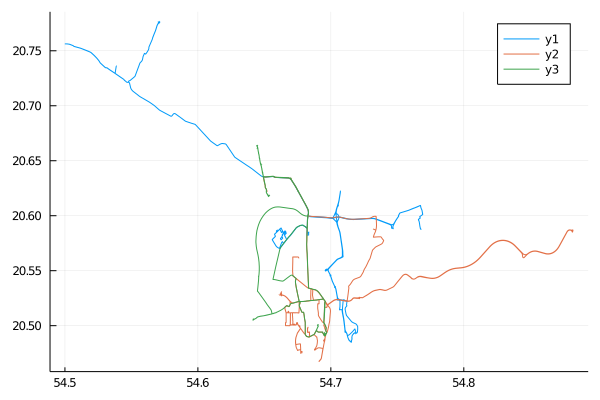

In [40]:
plot(map(x -> (x.coord.lat, x.coord.lon), rides[3].points))
plot!(map(x -> (x.coord.lat, x.coord.lon), rides[2].points))
plot!(map(x -> (x.coord.lat, x.coord.lon), rides[1].points))

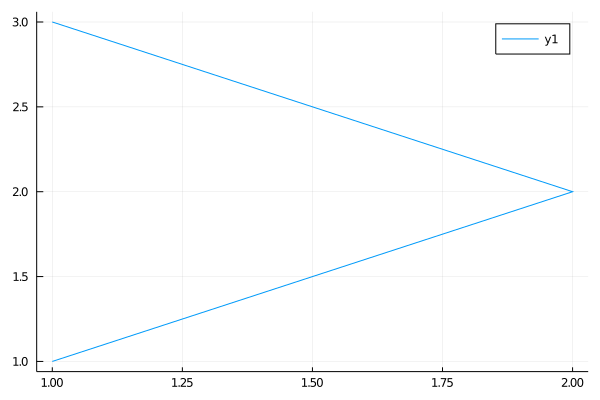

In [29]:
plot([(1, 1), (2, 2), (1, 3)])

In [50]:
route = rides[1].points
@benchmark MinimalRides.mileage($route)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     200.925 μs (0.00% GC)
  median time:      202.465 μs (0.00% GC)
  mean time:        215.370 μs (0.00% GC)
  maximum time:     2.218 ms (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [48]:
MinimalRides.mileage(route)

67524.29083931583

In [49]:
MinimalRides.mileage(route)

67.36985296592229

In [99]:
smooth1 = MinimalRides.smooth(MinimalRides.DistanceSmoothing(1), rides[3])

MinimalRides.Ride(MinimalRides.Info("0a621171-c263-11e9-80f2-10604ba895dc", "e0d05bbd-fd48-493e-bde5-89e49416450b", "Легковой\\Седан", 5, 427, :passenger, ZonedDateTime(2019, 8, 20, 3, 10, tz"UTC"), ZonedDateTime(2019, 8, 20, 20, 30, tz"UTC")), MinimalRides.Location[MinimalRides.Location(1566270601, LatLon(lat=54.6830116667°, lon=20.5844566667°)), MinimalRides.Location(1566274433, LatLon(lat=54.6822725°, lon=20.5907866667°)), MinimalRides.Location(1566274553, LatLon(lat=54.6873541667°, lon=20.5991725°)), MinimalRides.Location(1566274604, LatLon(lat=54.7004958333°, lon=20.5980366667°)), MinimalRides.Location(1566274653, LatLon(lat=54.7136283333°, lon=20.5969483333°)), MinimalRides.Location(1566274697, LatLon(lat=54.7259016667°, lon=20.59733°)), MinimalRides.Location(1566274741, LatLon(lat=54.7377791667°, lon=20.59536°)), MinimalRides.Location(1566274779, LatLon(lat=54.7465766667°, lon=20.5919566667°)), MinimalRides.Location(1566274843, LatLon(lat=54.7527383333°, lon=20.602795°)), Minima

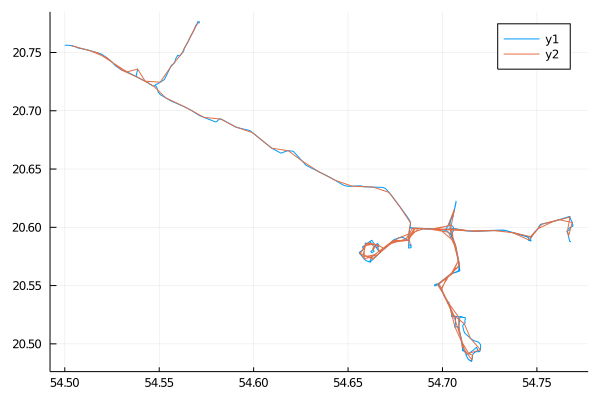

In [100]:
plot(map(x -> (x.coord.lat, x.coord.lon), rides[3].points))
plot!(map(x -> (x.coord.lat, x.coord.lon), smooth1.points))

In [101]:
length(smooth1), length(rides[1])

(140, 3549)

In [93]:
smooth1 = MinimalRides.smooth(MinimalRides.SegmentSmoothing(50), rides[1])

MinimalRides.Ride(MinimalRides.Info("0a08bbc3-cfdb-11e9-80f2-10604ba895dc", "e2a88069-360c-11e5-989b-00155d630038", "Специальный\\Вахтовая а/м", 21, 4, :bus, ZonedDateTime(2019, 9, 6, 5, tz"UTC"), ZonedDateTime(2019, 9, 6, 14, tz"UTC")), MinimalRides.Location[MinimalRides.Location(1567749960, LatLon(lat=54.696055°, lon=20.4923216667°)), MinimalRides.Location(1567751932, LatLon(lat=54.6958966667°, lon=20.492205°)), MinimalRides.Location(1567752060, LatLon(lat=54.6964733333°, lon=20.49304°)), MinimalRides.Location(1567752174, LatLon(lat=54.6959066667°, lon=20.4997983333°)), MinimalRides.Location(1567752310, LatLon(lat=54.695075°, lon=20.5075083333°)), MinimalRides.Location(1567752500, LatLon(lat=54.6941366667°, lon=20.5249283333°)), MinimalRides.Location(1567752804, LatLon(lat=54.6828683333°, lon=20.5458033333°)), MinimalRides.Location(1567753203, LatLon(lat=54.68261°, lon=20.5996966667°)), MinimalRides.Location(1567753581, LatLon(lat=54.67534°, lon=20.6221566667°)), MinimalRides.Locatio

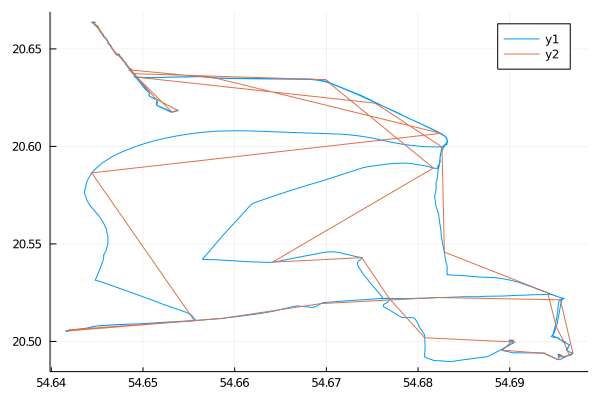

In [94]:
plot(map(x -> (x.coord.lat, x.coord.lon), rides[1].points))
plot!(map(x -> (x.coord.lat, x.coord.lon), smooth1.points))

In [125]:
smooth1 = MinimalRides.smooth(MinimalRides.DistanceSmoothing(0.1), rides[1])
smooth2 = MinimalRides.smooth(MinimalRides.DistanceSmoothing(0.1), rides[2])

MinimalRides.Ride(MinimalRides.Info("0a904e10-da13-11e9-80f2-10604ba895dc", "e2a88099-360c-11e5-989b-00155d630038", "Легковой\\Внедорожник", 4, 525, :passenger, ZonedDateTime(2019, 9, 19, 14, tz"UTC"), ZonedDateTime(2019, 9, 20, 5, tz"UTC")), MinimalRides.Location[MinimalRides.Location(1568901702, LatLon(lat=54.683172°, lon=20.498594°)), MinimalRides.Location(1568911368, LatLon(lat=54.682496°, lon=20.497702°)), MinimalRides.Location(1568911383, LatLon(lat=54.682452°, lon=20.496094°)), MinimalRides.Location(1568911395, LatLon(lat=54.682496°, lon=20.494076°)), MinimalRides.Location(1568911407, LatLon(lat=54.68334°, lon=20.49399°)), MinimalRides.Location(1568911424, LatLon(lat=54.683944°, lon=20.493466°)), MinimalRides.Location(1568911448, LatLon(lat=54.68396°, lon=20.490362°)), MinimalRides.Location(1568911469, LatLon(lat=54.685728°, lon=20.490886°)), MinimalRides.Location(1568911478, LatLon(lat=54.687076°, lon=20.491704°)), MinimalRides.Location(1568911494, LatLon(lat=54.688564°, lon=20

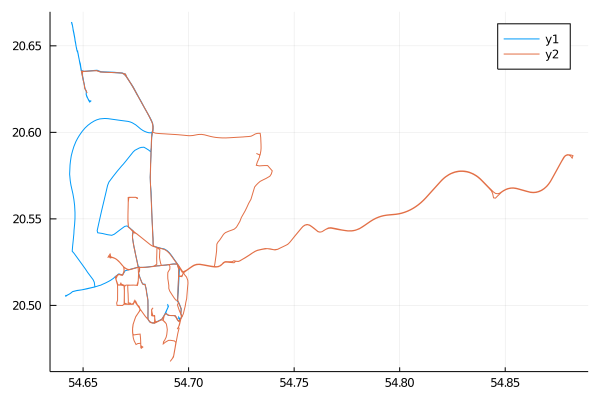

In [129]:
plot(map(x -> (x.coord.lat, x.coord.lon), smooth1.points))
plot!(map(x -> (x.coord.lat, x.coord.lon), smooth2.points))

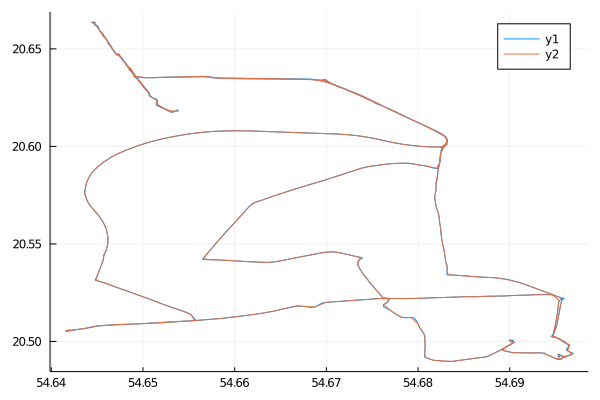

In [131]:
plot(map(x -> (x.coord.lat, x.coord.lon), rides[1].points))
plot!(map(x -> (x.coord.lat, x.coord.lon), smooth1.points))

In [126]:
MinimalRides.coverage(smooth1, smooth2, 1.0)

(cov1 = 0.7593052109181141, cov2 = 0.6611842105263158)

In [127]:
@benchmark MinimalRides.coverage($smooth1, $smooth2, 1.0)

BenchmarkTools.Trial: 
  memory estimate:  12.94 KiB
  allocs estimate:  2
  --------------
  minimum time:     28.087 ms (0.00% GC)
  median time:      29.084 ms (0.00% GC)
  mean time:        29.559 ms (0.00% GC)
  maximum time:     42.136 ms (0.00% GC)
  --------------
  samples:          170
  evals/sample:     1

In [26]:
using BenchmarkTools
@benchmark distance(LatLon(54.5518416667, 20.5963833333), LatLon(54.55189, 20.596355))

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     112.958 ns (0.00% GC)
  median time:      115.895 ns (0.00% GC)
  mean time:        124.382 ns (0.00% GC)
  maximum time:     1.224 μs (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     921

In [122]:
smooth_rides = MinimalRides.smooth.(Ref(MinimalRides.DistanceSmoothing(0.1)), rides)

3-element Array{MinimalRides.Ride,1}:
 MinimalRides.Ride(MinimalRides.Info("0a08bbc3-cfdb-11e9-80f2-10604ba895dc", "e2a88069-360c-11e5-989b-00155d630038", "Специальный\\Вахтовая а/м", 21, 4, :bus, ZonedDateTime(2019, 9, 6, 5, tz"UTC"), ZonedDateTime(2019, 9, 6, 14, tz"UTC")), MinimalRides.Location[MinimalRides.Location(1567749960, LatLon(lat=54.696055°, lon=20.4923216667°)), MinimalRides.Location(1567751953, LatLon(lat=54.6959733333°, lon=20.4919766667°)), MinimalRides.Location(1567752030, LatLon(lat=54.6965066667°, lon=20.492885°)), MinimalRides.Location(1567752095, LatLon(lat=54.69688°, lon=20.4937016667°)), MinimalRides.Location(1567752114, LatLon(lat=54.6963066667°, lon=20.4952183333°)), MinimalRides.Location(1567752135, LatLon(lat=54.696515°, lon=20.4979833333°)), MinimalRides.Location(1567752147, LatLon(lat=54.6960583333°, lon=20.4993966667°)), MinimalRides.Location(1567752201, LatLon(lat=54.6958483333°, lon=20.5001516667°)), MinimalRides.Location(1567752227, LatLon(lat=54.695363

In [124]:
MinimalRides.coverage(smooth_rides[1], smooth_rides[2], 1.0),
MinimalRides.coverage(smooth_rides[1], smooth_rides[3], 1.0),
MinimalRides.coverage(smooth_rides[2], smooth_rides[3], 1.0)

((cov1 = 0.7593052109181141, cov2 = 0.6611842105263158), (cov1 = 0.4317617866004963, cov2 = 0.35363247863247865), (cov1 = 0.26069078947368424, cov2 = 0.37393162393162394))

In [152]:
MinimalRides.results(rides) |> DataFrame

,i,j,cov1,cov2,cov,len1,len2,len,op
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2,0.745763,0.658462,1.40422,67.3699,180.167,247.537,0.682221
2,1,3,0.440678,0.339695,0.780373,67.3699,148.642,216.012,0.371189
3,2,3,0.255385,0.374046,0.62943,180.167,148.642,328.809,0.309027


In [155]:
MinimalRides.results(rides) |> DataFrame

,i,j,cov1,cov2,cov,len1,len2,len,op
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,2,0.745763,0.658462,1.40422,67.3699,180.167,247.537,0.682221
2,1,3,0.440678,0.339695,0.780373,67.3699,148.642,216.012,0.371189
3,2,3,0.255385,0.374046,0.62943,180.167,148.642,328.809,0.309027


In [14]:
@benchmark MinimalRides.results($rides)

BenchmarkTools.Trial: 
  memory estimate:  73.86 KiB
  allocs estimate:  79
  --------------
  minimum time:     8.203 ms (0.00% GC)
  median time:      9.423 ms (0.00% GC)
  mean time:        9.625 ms (0.00% GC)
  maximum time:     18.923 ms (0.00% GC)
  --------------
  samples:          520
  evals/sample:     1

In [147]:
@time MinimalRides.smooth.(Ref(MinimalRides.DistanceSmoothing(0.5)), rides)

  0.001410 seconds (32 allocations: 55.656 KiB)


3-element Array{MinimalRides.Ride,1}:
 MinimalRides.Ride(MinimalRides.Info("0a08bbc3-cfdb-11e9-80f2-10604ba895dc", "e2a88069-360c-11e5-989b-00155d630038", "Специальный\\Вахтовая а/м", 21, 4, :bus, ZonedDateTime(2019, 9, 6, 5, tz"UTC"), ZonedDateTime(2019, 9, 6, 14, tz"UTC")), MinimalRides.Location[MinimalRides.Location(1567749960, LatLon(lat=54.696055°, lon=20.4923216667°)), MinimalRides.Location(1567752135, LatLon(lat=54.696515°, lon=20.4979833333°)), MinimalRides.Location(1567752284, LatLon(lat=54.69473°, lon=20.5034916667°)), MinimalRides.Location(1567752366, LatLon(lat=54.6954033333°, lon=20.51493°)), MinimalRides.Location(1567752439, LatLon(lat=54.6955283333°, lon=20.522425°)), MinimalRides.Location(1567752590, LatLon(lat=54.69216°, lon=20.5283866667°)), MinimalRides.Location(1567752630, LatLon(lat=54.688455°, lon=20.5326333333°)), MinimalRides.Location(1567752721, LatLon(lat=54.6833633333°, lon=20.5341283333°)), MinimalRides.Location(1567752784, LatLon(lat=54.6829816667°, lon=20.

In [148]:
@time MinimalRides.mileage.(rides)

  0.000793 seconds (3 allocations: 144 bytes)


3-element Array{Float64,1}:
  67.36985296592229
 180.1671734941379
 148.64214704313508

In [11]:
url = "https://github.com/epogrebnyak/rides-minimal/blob/master/sample_jsons/sample_jsons.zip?raw=true"
cache = "/tmp/sample_jsons.zip"
rides = MinimalRides.download(url, "/tmp/sample.zip");

┌ Info: Processing 3 rides from /tmp/sample.zip
└ @ MinimalRides /home/skoffer/.julia/dev/MinimalRides/src/MinimalRides.jl:113
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


In [12]:
length(rides)

3